In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [10]:
from PIL import Image

In [11]:
from tensorflow.keras.layers import Input,Dense,Flatten,BatchNormalization,GlobalAveragePooling2D,Dropout,Conv2D,MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model

In [12]:
genobj=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,rescale=1/255.0,validation_split=0.2)

In [13]:
np.array(Image.open('/content/Dataset_Binary/six/img 601.jpg')).shape

(300, 300, 3)

In [14]:
BATCH_SIZE=20

In [15]:
train_obj=genobj.flow_from_directory('/content/Dataset_Binary',target_size=(300,300),batch_size=BATCH_SIZE,subset='training')

Found 4591 images belonging to 16 classes.


In [16]:
val_obj=genobj.flow_from_directory('/content/Dataset_Binary',target_size=(300,300),batch_size=BATCH_SIZE,subset='validation')

Found 1142 images belonging to 16 classes.


In [17]:
train_obj.classes

array([ 1,  1,  1, ..., 15, 15, 15], dtype=int32)

In [18]:
def plot_image():
    list_image_label=[]
    for i in range(9):
        batch=next(train_obj)
        rndm_no=np.random.randint(0,len(next(train_obj)[0]))
        list_image_label.append((batch[0][rndm_no],batch[1][rndm_no]))
    return list_image_label

In [19]:
list_img=plot_image()

{'.ipynb_checkpoints': 0,
 'down': 1,
 'eight': 2,
 'five': 3,
 'four': 4,
 'left': 5,
 'nine': 6,
 'one': 7,
 'right': 8,
 'seven': 9,
 'six': 10,
 'stop': 11,
 'three': 12,
 'two': 13,
 'up': 14,
 'zero': 15}

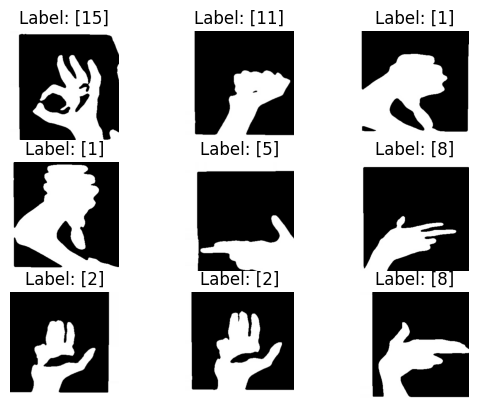

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [20]:
fig,axes=plt.subplots(3,3)
axes=axes.flatten()
count=0
for i,j in list_img:

    plt.figure()
    label=np.where(j==1)[0]
    axes[count].imshow(i, cmap='gray')
    axes[count].set_title(f'Label: {label}')
    axes[count].axis('off')
    count+=1
plt.tight_layout()
train_obj.class_indices

In [21]:
def draw_single(obj):
    batch=next(obj)
    image,label=batch[0][0],batch[1][0]
    return image,label

In [22]:
img,lbl=draw_single(train_obj)

(-0.5, 299.5, 299.5, -0.5)

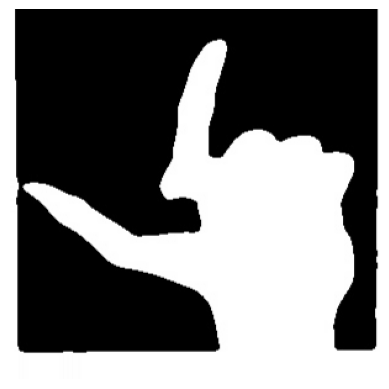

In [23]:
plt.imshow(img)
plt.axis('off')

In [24]:
input_shape=img.shape

In [25]:
from tensorflow.keras.optimizers import Adam

In [26]:
steps_per_epoch=5000//BATCH_SIZE

In [31]:
from tensorflow.keras.applications import ResNet50

In [28]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

# Add custom head for your specific task (e.g., classification)
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(15, activation='softmax')(x)

# Combine base model and custom head
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 [==============================] - 1s 0us/step
